In [11]:
import sys, os
import ROOT

#import pandas as pd
#import tensorflow as tf
#import root_numpy as rnp
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm import tqdm
#import emoji
import glob
import time as t
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.ndimage import gaussian_filter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import  label_binarize, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import sklearn
############ colors ##############
def Red(prt): print("\033[91m {}\033[00m" .format(prt))
def Green(prt): print("\033[92m {}\033[00m" .format(prt))
def Yellow(prt): print("\033[93m {}\033[00m" .format(prt))
#############################################
d = dict(file=sys.stdout,colour='green')
from matplotlib.font_manager import FontProperties
from matplotlib import colors
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams['text.usetex'] = True
from matplotlib.colors import LogNorm
plt.style.use('seaborn-whitegrid')
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten,  Conv2DTranspose, MaxPooling2D, UpSampling2D
from tensorflow.keras import regularizers
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten,  Conv2DTranspose, MaxPooling2D, UpSampling2D
from tensorflow.keras import regularizers

In [4]:
outdir='/scratch/Hammad/work/data_Toponium'
Image_sig=np.load(outdir+'/Image_s.npz',allow_pickle=True)['arr_0']
Image_bkg=np.load(outdir+'/Image_b1.npz',allow_pickle=True)['arr_0']

In [16]:
k = 100000
x1_data = np.concatenate((Image_sig[:k], Image_bkg[:k]))
y1_data = np.array([1]*len(Image_sig[:k])+[0]*len(Image_bkg[:k]))
x_data,y_data= sklearn.utils.shuffle(x1_data, y1_data) # shuffle both 

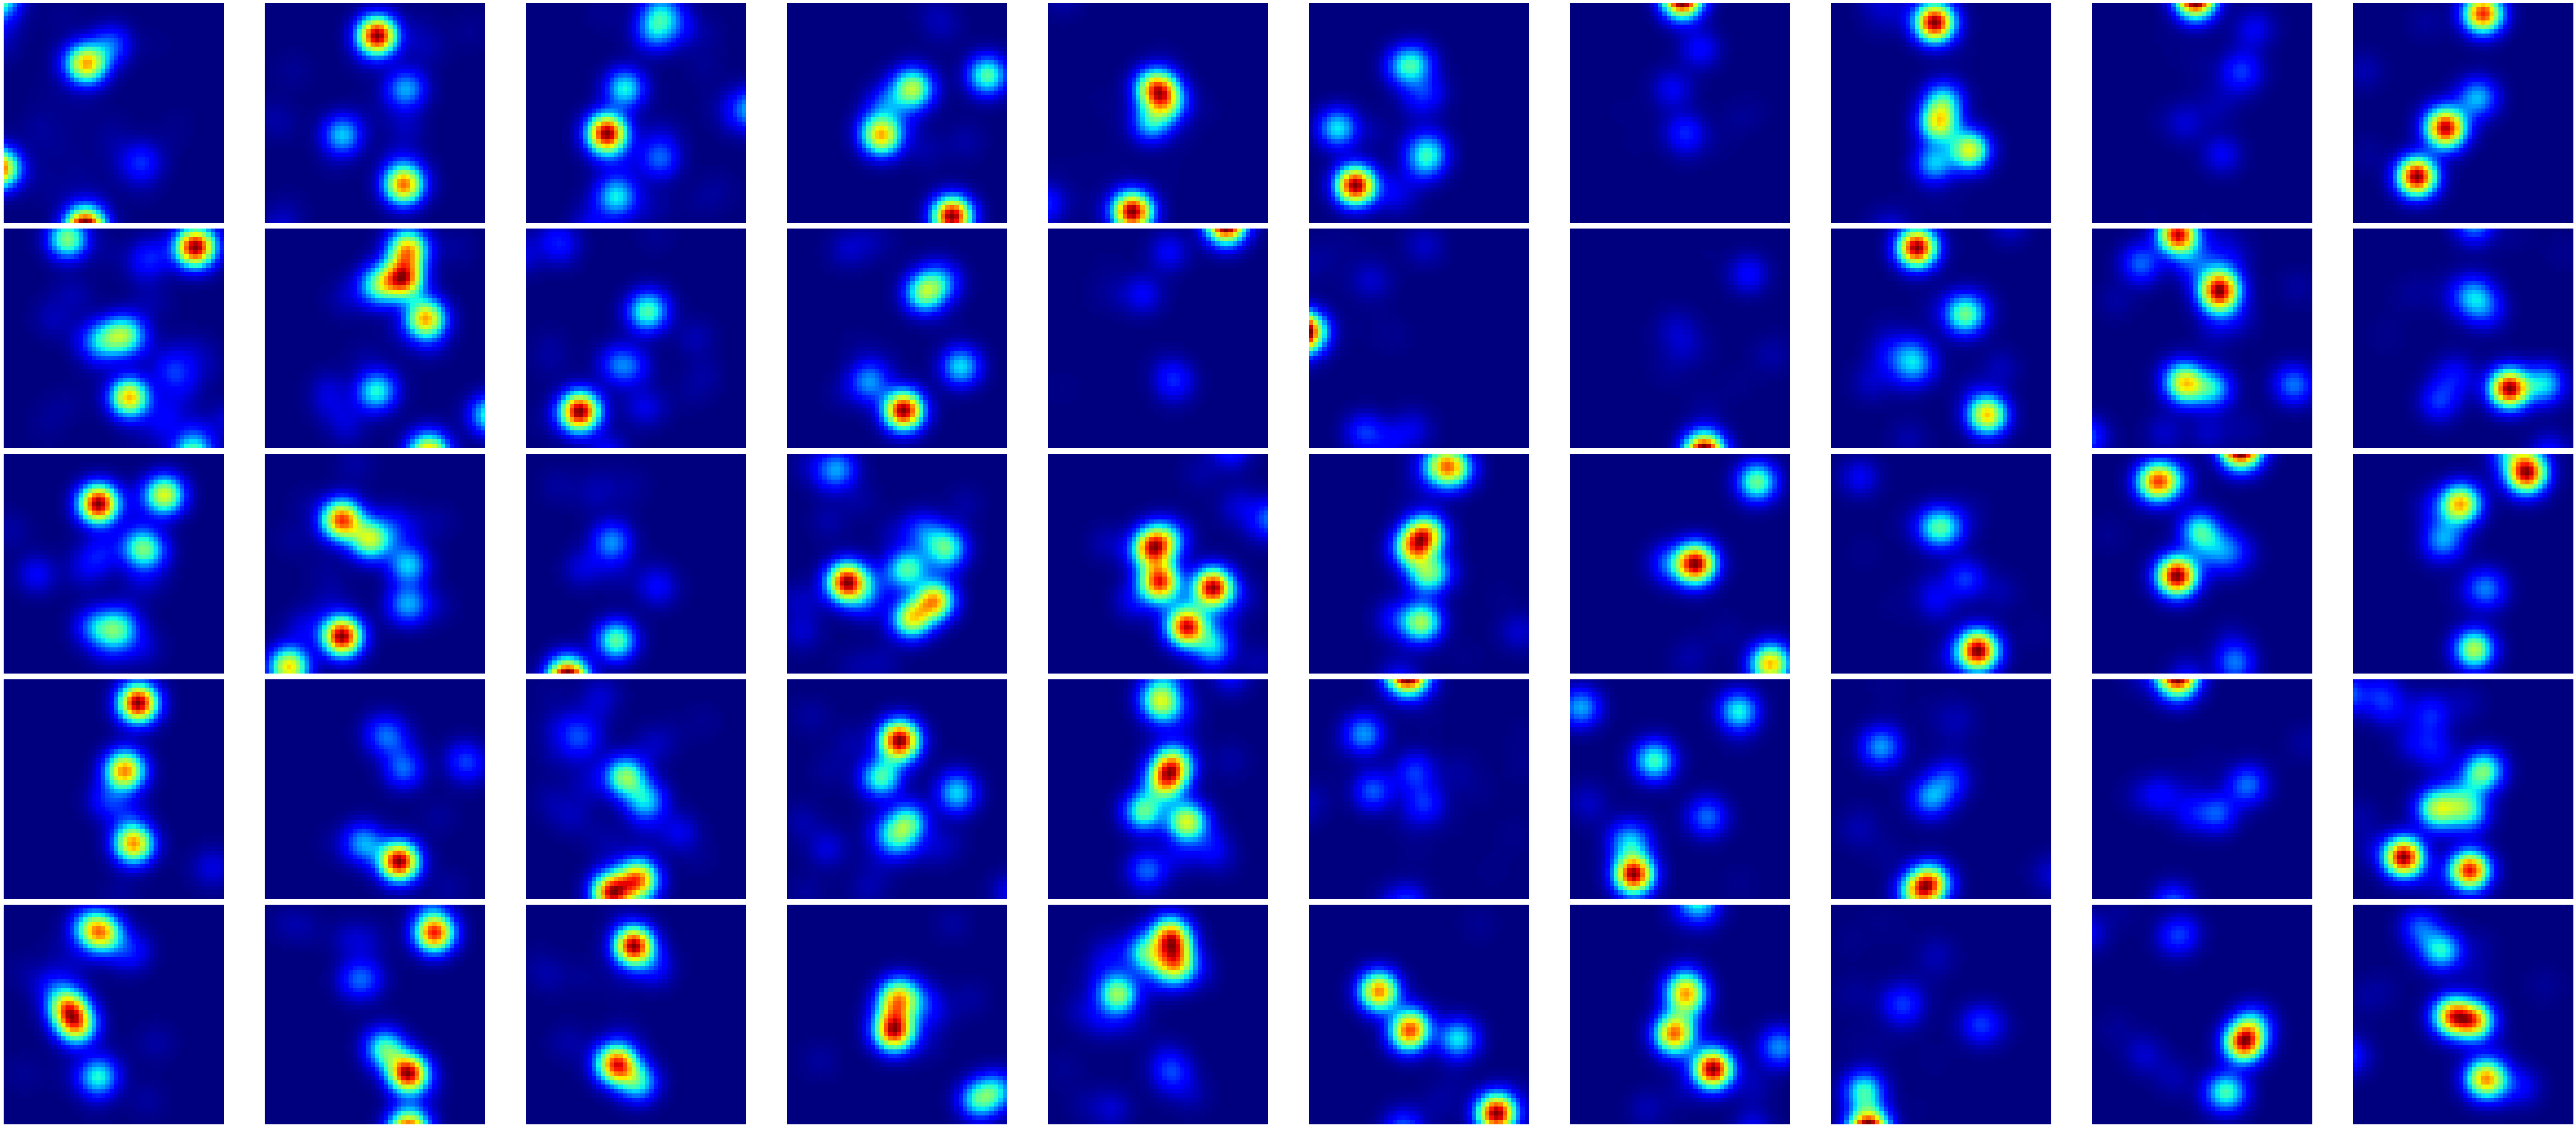

In [6]:
fig = plt.figure(figsize=(70,30))
for i in range(50):
    y =  fig.add_subplot(5,10,i+1)
    y.imshow(x_data[i],cmap='jet');
    y.axis('off')
plt.tight_layout()    

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,shuffle=True, test_size=0.2)

In [18]:
x_train= np.array(X_train).reshape(np.array(X_train).shape+(1,)).astype('float32')
x_test= np.array(X_test).reshape(np.array(X_test).shape+(1,)).astype('float32')
x_train.shape,x_test.shape

((37570, 50, 50, 1), (9393, 50, 50, 1))

In [19]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [45]:
reg_output = tf.keras.layers.ActivityRegularization(l1=0.01, l2=0.00)
inp = Input((50, 50,1))
e = Conv2D(16, (3, 3), activation='relu')(inp)
e = Conv2D(16, (3, 3), activation='relu')(e)
e = MaxPooling2D((2, 2))(e)
#e= Dropout(0.25)(e)
e = reg_output(e)
e = Conv2D(32, (3, 3), activation='relu')(e)
e = Conv2D(32, (3, 3), activation='relu')(e)
e = MaxPooling2D((2, 2))(e)
e = reg_output(e)
e = Conv2D(64, (2, 2), activation='relu')(e)
e = Conv2D(64, (2, 2), activation='relu')(e)
e = MaxPooling2D((2, 2))(e)
e = reg_output(e)
e = Flatten()(e)
e = Dense(128, activation='relu')(e)
#e= Dropout(0.25)(e)
e= reg_output(e)
x=  Dense(2, activation="softmax")(e)
cnn = Model(inp,x)
cnn.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 50, 50, 1)]  0           []                               
                                                                                                  
 conv2d_54 (Conv2D)             (None, 48, 48, 16)   160         ['input_9[0][0]']                
                                                                                                  
 conv2d_55 (Conv2D)             (None, 46, 46, 16)   2320        ['conv2d_54[0][0]']              
                                                                                                  
 max_pooling2d_27 (MaxPooling2D  (None, 23, 23, 16)  0           ['conv2d_55[0][0]']              
 )                                                                                         

In [46]:
cnn.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-03), metrics=['accuracy'])
history_cnn = cnn.fit(x_train, y_train, validation_split=0.15, epochs=20, batch_size=500,shuffle=False, verbose=1)


Epoch 1/20
64/64 [==============================] - 2s 20ms/step - loss: 0.4278 - accuracy: 0.9415 - val_loss: 0.3079 - val_accuracy: 0.9501
Epoch 2/20
64/64 [==============================] - 1s 11ms/step - loss: 0.2976 - accuracy: 0.9470 - val_loss: 0.2763 - val_accuracy: 0.9501
Epoch 3/20
64/64 [==============================] - 1s 11ms/step - loss: 0.2757 - accuracy: 0.9470 - val_loss: 0.2603 - val_accuracy: 0.9501
Epoch 4/20
64/64 [==============================] - 1s 11ms/step - loss: 0.2628 - accuracy: 0.9470 - val_loss: 0.2497 - val_accuracy: 0.9501
Epoch 5/20
64/64 [==============================] - 1s 11ms/step - loss: 0.2539 - accuracy: 0.9470 - val_loss: 0.2421 - val_accuracy: 0.9501
Epoch 6/20
64/64 [==============================] - 1s 11ms/step - loss: 0.2477 - accuracy: 0.9470 - val_loss: 0.2367 - val_accuracy: 0.9501
Epoch 7/20
64/64 [==============================] - 1s 11ms/step - loss: 0.2428 - accuracy: 0.9470 - val_loss: 0.2322 - val_accuracy: 0.9501
Epoch 8/20
64

In [47]:
aeN = Model(inp,cnn.layers[1].output)

In [48]:
yhat = aeN.predict(x_train[3].reshape(-1,50,50,1))

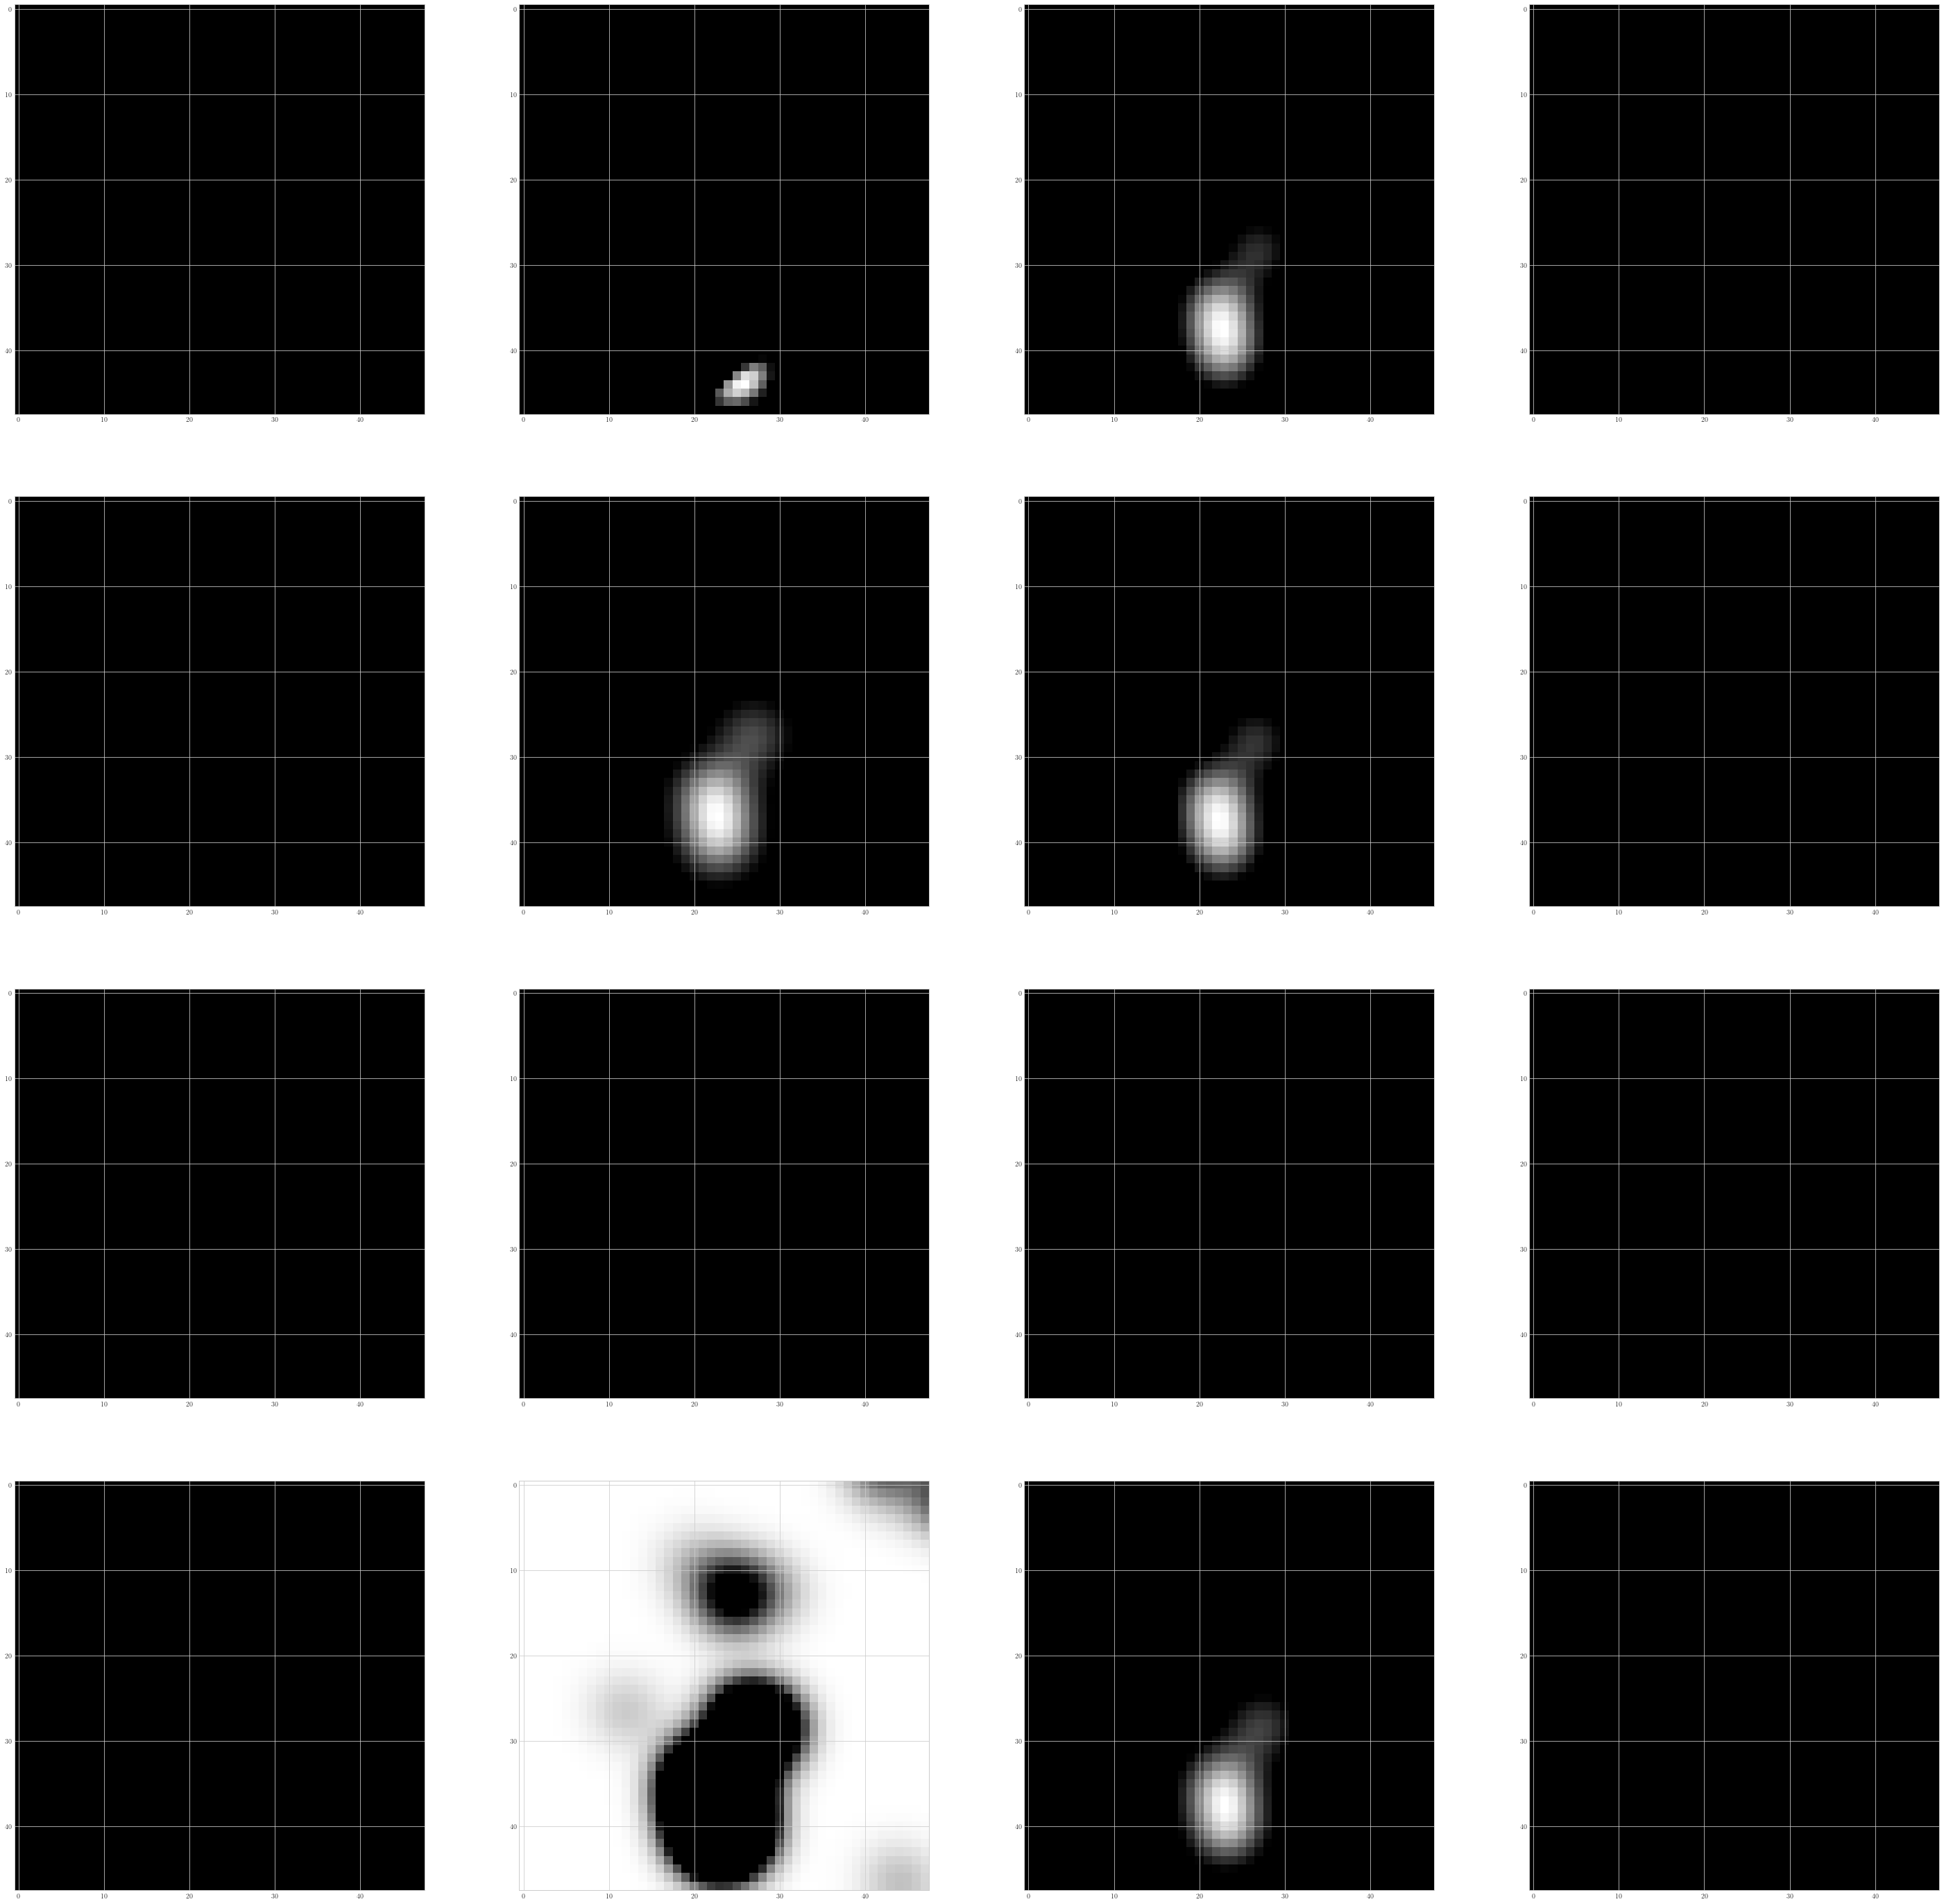

In [39]:
fig = plt.figure(figsize=(50,50))
for i in range(16):
    y = fig.add_subplot(4,4,i+1)
    y.imshow(yhat[0,:,:,i],cmap='gray',interpolation='nearest')

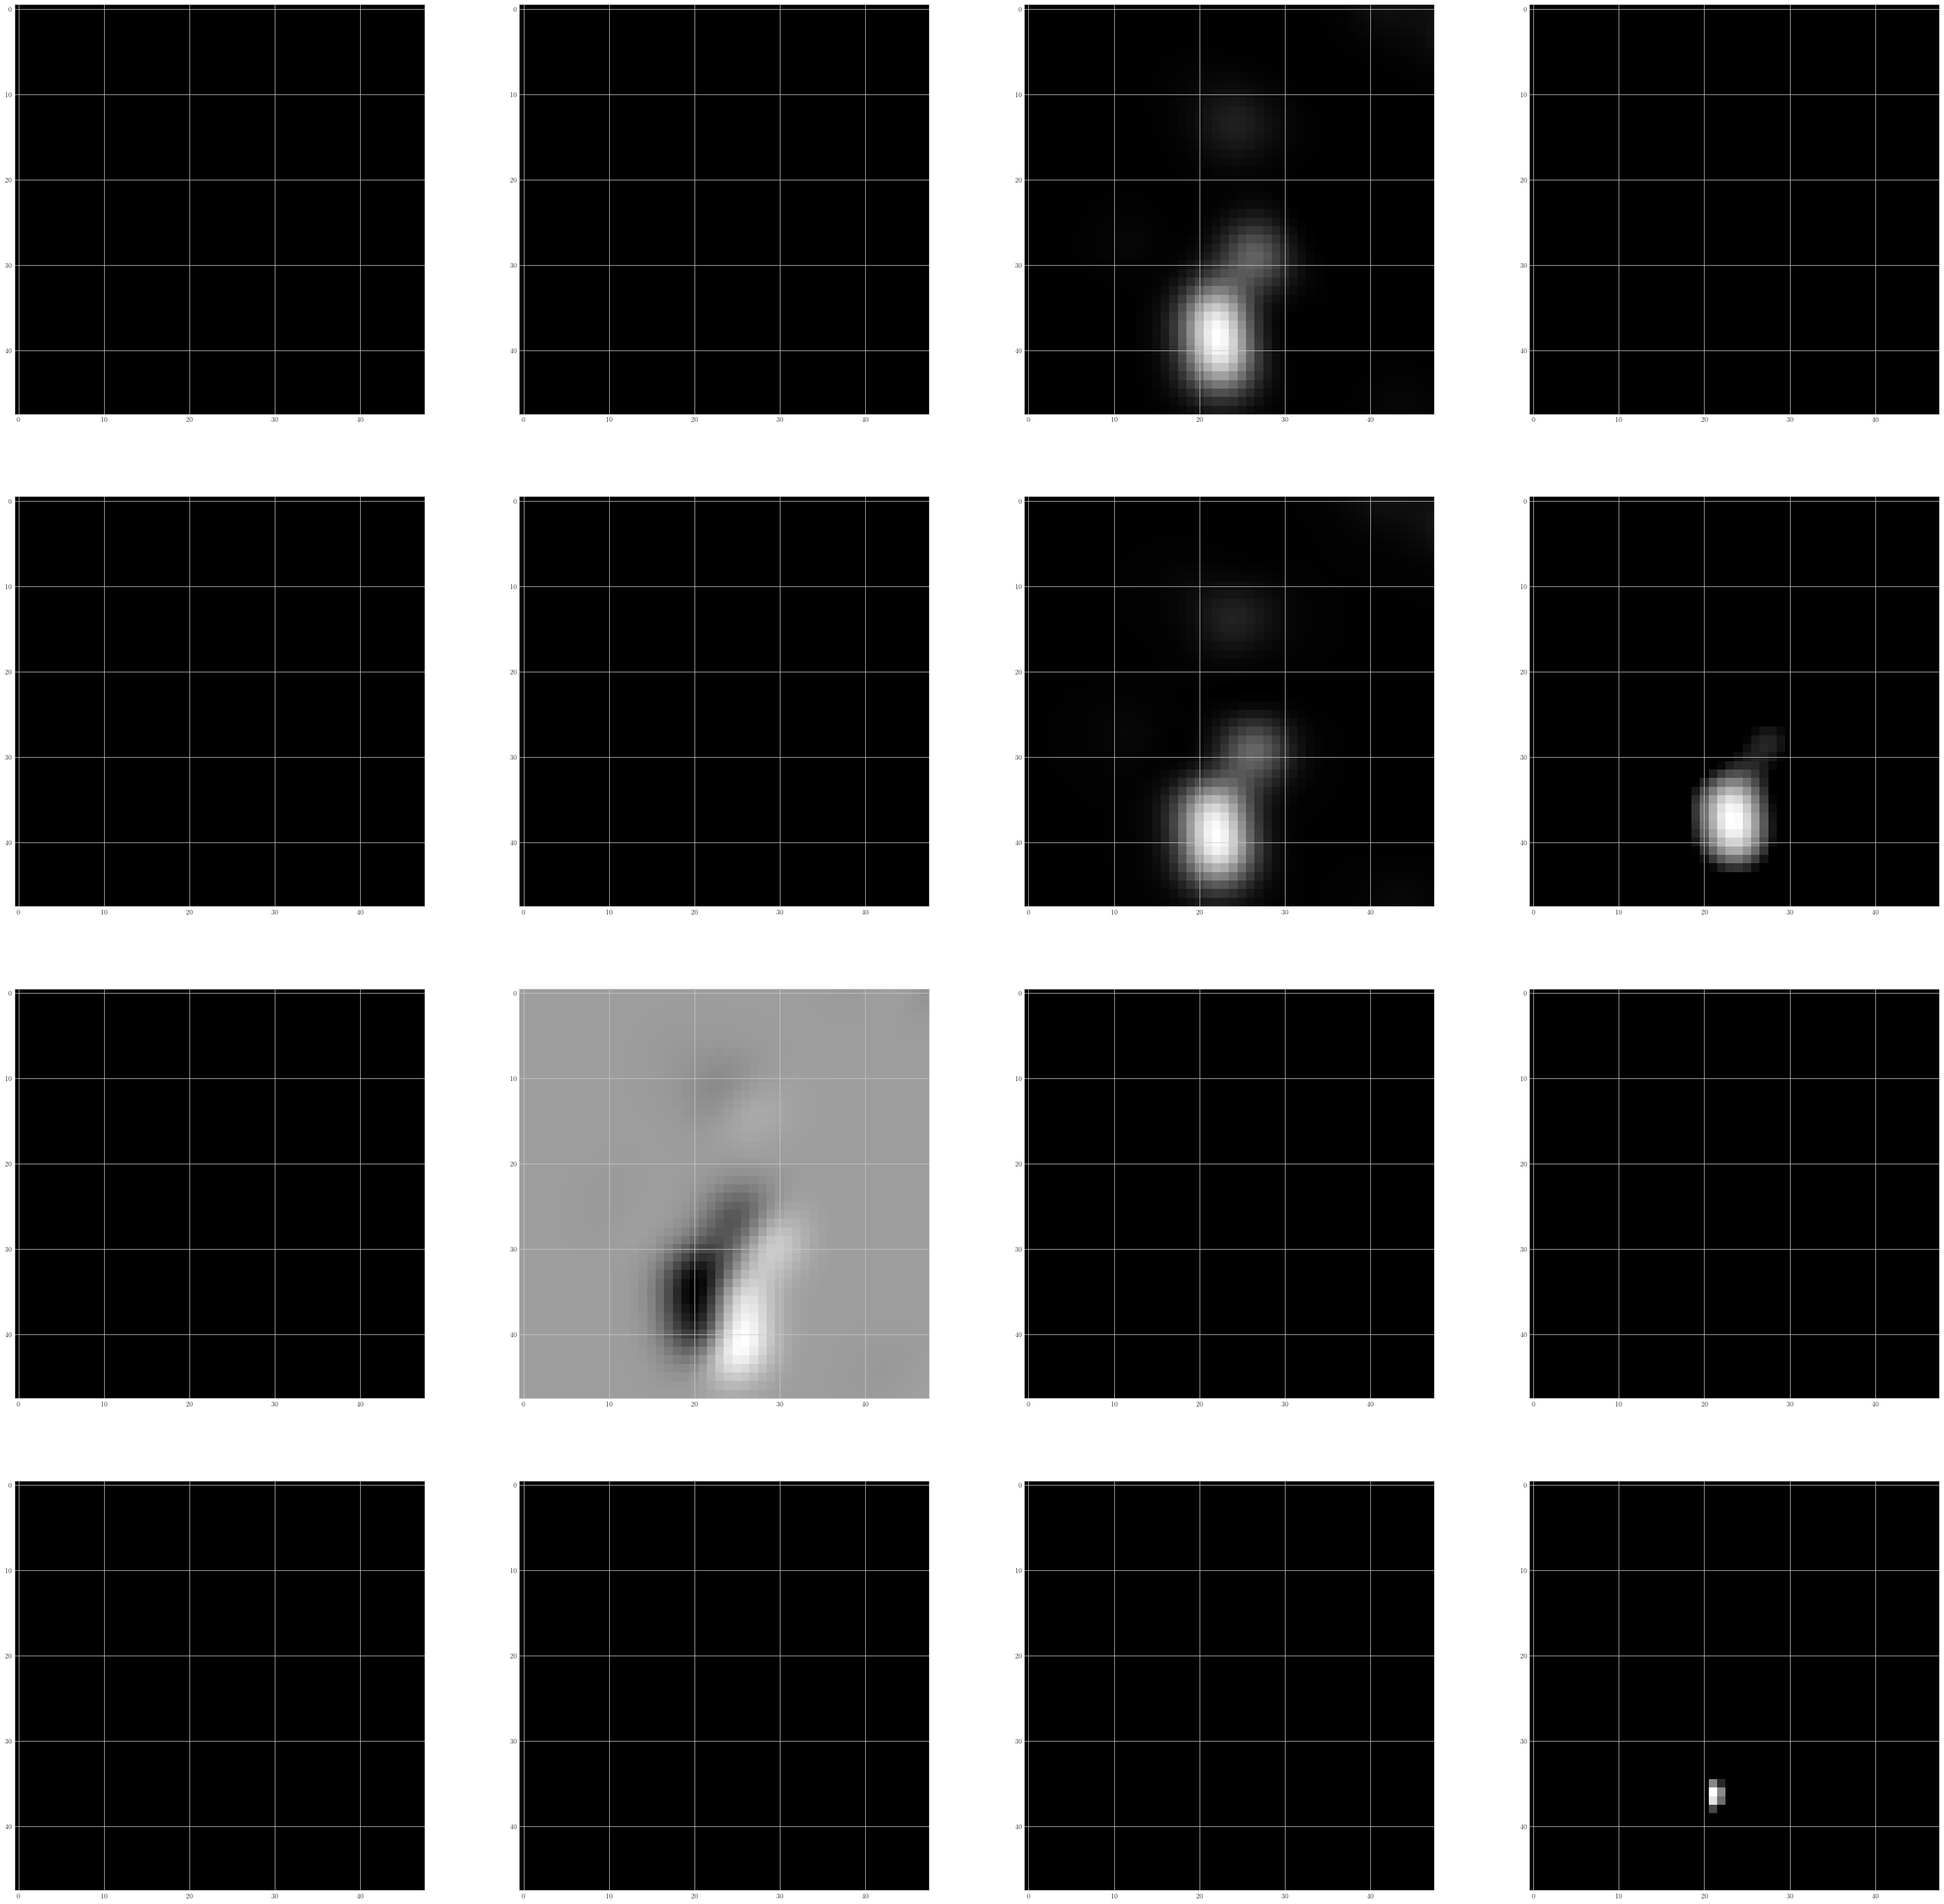

In [49]:
fig = plt.figure(figsize=(50,50))
for i in range(16):
    y = fig.add_subplot(4,4,i+1)
    y.imshow(yhat[0,:,:,i],cmap='gray',interpolation='nearest')

(0.96+0.4j)